# Notebook C: Evaluation of ML Algorithms for Rate Prediction of Syngas Fermentation

### Setup imports

In [12]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.neural_network, sklearn.svm, sklearn.ensemble
import scipy.stats
import matplotlib.pyplot as plt

### Load data that was generated in notebook A

In [2]:
rates_df = pd.read_csv(f'../data/rates_data.csv')
print(f'Shape of the rates data: {rates_df.shape[0]} rows by {rates_df.shape[1]} columns')

Shape of the rates data: 836 rows by 18 columns


### Create train and test sets

In [3]:
train_data = rates_df[rates_df.composition.isin([1,2,3,4,5,6,7])]
test_data = rates_df[rates_df.composition.isin([8,9,10])]
print(f'Shape of the training data: {train_data.shape[0]} rows by {train_data.shape[1]} columns')
print(f'Shape of the testing data: {test_data.shape[0]} rows by {test_data.shape[1]} columns')

Shape of the training data: 657 rows by 18 columns
Shape of the testing data: 179 rows by 18 columns


### Define a function that generates the input and output arrays for scikit learn's API

In [4]:
def get_X_y_arrays(data):
    
    # prevent set with copy error
    data_copy = data.copy()
    
    # ML input
    X = data_copy [[
        'biomass (g/L)', 'ethanol (mM)', 'acetate (mM)', 'butanol (mM)', 
         'butyrate (mM)', 'N2', 'CO', 'CO2', 'H2', 'flow rate (mL/min)'
    ]]
    
    # ML output
    y = data_copy [[
        'biomass rate', 'ethanol rate', 'acetate rate', 'butanol rate', 'butyrate rate'
    ]]
 
    return np.array(X), np.array(y)

### Split data into ML input and output

In [5]:
X_train, y_train = get_X_y_arrays(train_data)
X_test, y_test = get_X_y_arrays(test_data)

print(f'Shape of the train X array: {X_train.shape[0]} rows by {X_train.shape[1]} columns')
print(f'Shape of the train y array: {y_train.shape[0]} rows by {y_train.shape[1]} columns')
print(f'Shape of the test X array: {X_test.shape[0]} rows by {X_test.shape[1]} columns')
print(f'Shape of the test y array: {y_test.shape[0]} rows by {y_test.shape[1]} columns')

Shape of the train X array: 657 rows by 10 columns
Shape of the train y array: 657 rows by 5 columns
Shape of the test X array: 179 rows by 10 columns
Shape of the test y array: 179 rows by 5 columns


### Define a dictionary of models with optimized parameters from notebook B

In [6]:
optimized_models = {
    "acetate": {
        "nn": sklearn.neural_network.MLPRegressor(
            shuffle=True, 
            activation = 'relu', 
            hidden_layer_sizes = [100, 100, 60, 100],
            max_iter = 5000
        ),
        "svm_rbf": sklearn.svm.SVR(
            kernel = 'rbf', 
            C = 10000, 
            epsilon = 0.1, 
            gamma = 10
        ),
        'rf': sklearn.ensemble.RandomForestRegressor(
            max_depth = 36,
            # max_samples = 0.5,
            n_estimators = 110
        ),
        'en': sklearn.linear_model.ElasticNet(
            alpha =  0.1,
            l1_ratio = 1.0
        ),
        'lasso': sklearn.linear_model.Lasso(
            alpha = 0.1
        ),
        'knn': sklearn.neighbors.KNeighborsRegressor(
            algorithm = 'ball_tree',
            leaf_size = 5,
            n_neighbors = 2,
            weights = 'distance'
        ),
    },
    "biomass": {
        "nn": sklearn.neural_network.MLPRegressor(
            shuffle=True, 
            activation = 'relu', 
            hidden_layer_sizes = [100, 100, 100, 100],
            max_iter = 5000
        ),
        "svm_rbf": sklearn.svm.SVR(
            kernel = 'rbf', 
            C = 100, 
            epsilon = 0.01, 
            gamma = 100
        ),
        'rf': sklearn.ensemble.RandomForestRegressor(
            max_depth = 14,
            # max_samples = 0.5,
            n_estimators = 50
        ),
        'en': sklearn.linear_model.ElasticNet(
            alpha =  0.0001,
            l1_ratio = 1.0
        ),
        'lasso': sklearn.linear_model.Lasso(
            alpha = 0.0001
        ),
        'knn': sklearn.neighbors.KNeighborsRegressor(
            algorithm = 'ball_tree',
            leaf_size = 5,
            n_neighbors = 2,
            weights = 'distance'
        ),
    },
    "butanol": {
        "nn": sklearn.neural_network.MLPRegressor(
            shuffle=True, 
            activation = 'relu', 
            hidden_layer_sizes = [60, 40, 80, 60],
            max_iter = 5000
        ),
        "svm_rbf": sklearn.svm.SVR(
            kernel = 'rbf', 
            C = 10000, 
            epsilon = 0.01, 
            gamma = 10
        ),
        'rf': sklearn.ensemble.RandomForestRegressor(
            max_depth = 24,
            n_estimators = 90
        ),
        'en': sklearn.linear_model.ElasticNet(
            alpha =  0.001,
            l1_ratio = 0.1
        ),
        'lasso': sklearn.linear_model.Lasso(
            alpha = 1e-10
        ),
        'knn': sklearn.neighbors.KNeighborsRegressor(
            algorithm = 'ball_tree',
            leaf_size = 5,
            n_neighbors = 2,
            weights = 'distance'
        ),
    },
    "butyrate": {
        "nn": sklearn.neural_network.MLPRegressor(
            shuffle=True, 
            activation = 'relu', 
            hidden_layer_sizes = [40, 40, 40, 40],
            max_iter = 5000
        ),
        "svm_rbf": sklearn.svm.SVR(
            kernel = 'rbf', 
            C = 10000, 
            epsilon = 0.01, 
            gamma = 10
        ),
        'rf': sklearn.ensemble.RandomForestRegressor(
            max_depth = 28,
            # max_samples = 0.5,
            n_estimators = 140
        ),
        'en': sklearn.linear_model.ElasticNet(
            alpha =  0.001,
            l1_ratio = 0.1
        ),
        'lasso': sklearn.linear_model.Lasso(
            alpha = 0.01
        ),
        'knn': sklearn.neighbors.KNeighborsRegressor(
            algorithm = 'ball_tree',
            leaf_size = 5,
            n_neighbors = 2,
            weights = 'distance'
        ),
    },
    "ethanol": {
        "nn": sklearn.neural_network.MLPRegressor(
            shuffle=True, 
            activation = 'tanh', 
            hidden_layer_sizes = [80, 80, 40, 100],
            max_iter = 5000
        ),
        "svm_rbf": sklearn.svm.SVR(
            kernel = 'rbf', 
            C = 10000, 
            epsilon = 0.1, 
            gamma = 10
        ),
        'rf': sklearn.ensemble.RandomForestRegressor(
            max_depth = 24,
            # max_samples = 0.5,
            n_estimators = 120
        ),
        'en': sklearn.linear_model.ElasticNet(
            alpha =  0.001,
            l1_ratio = 0.2
        ),
        'lasso': sklearn.linear_model.Lasso(
            alpha = 0.01
        ),
        'knn': sklearn.neighbors.KNeighborsRegressor(
            algorithm = 'ball_tree',
            leaf_size = 5,
            n_neighbors = 3,
            weights = 'distance'
        ),
    },
}
    


### Get the predictions of the models on the training set and test set

In [7]:
# Make a dictionary to save trained models 
trained_models = {}

# Define two dictionaries to hold data for training and test result data
model_train_output_dictionary = {}
model_test_output_dictionary = {}

# Scale both sets of X data
Scaler = sklearn.preprocessing.MinMaxScaler()
X_scaled_train = Scaler.fit_transform(X_train, y_test)
X_scaled_test = Scaler.fit_transform(X_test, y_test)

for index, output in enumerate(['biomass', 'ethanol', 'acetate', 'butanol', 'butyrate']):
    print(output)
    
    # separate out the output of interest
    y_train_output=y_train[:,index]
    y_test_output=y_test[:,index]
    
    # save the measured data in the output dictionaries
    model_train_output_dictionary[f'{output} measured'] = y_train_output
    model_test_output_dictionary[f'{output} measured'] = y_test_output
    
    for algorithm in ['nn', 'svm_rbf', 'rf', 'en', 'lasso', 'knn']:
        print(algorithm)

        # train the model and save it
        trained_model = optimized_models[output][algorithm].fit(X_scaled_train, y_train_output)
        trained_models[f'{output} {algorithm}'] = trained_model
        
        # test the model on training and test data
        y_train_prediction = trained_model.predict(X_scaled_train)
        y_test_prediction = trained_model.predict(X_scaled_test)
        
        # save the outputs in dictionaries
        model_train_output_dictionary[f'{output} {algorithm}'] = y_train_prediction
        model_test_output_dictionary[f'{output} {algorithm}'] = y_test_prediction
        
# convert the dictionaries to dataframes
train_prediction_df = pd.DataFrame(model_train_output_dictionary)
test_prediction_df = pd.DataFrame(model_test_output_dictionary)

# display the data frames
display(train_prediction_df.head())
display(test_prediction_df.head())

biomass
nn
svm_rbf
rf
en
lasso
knn
ethanol
nn
svm_rbf
rf
en
lasso
knn
acetate
nn
svm_rbf
rf
en
lasso
knn
butanol
nn
svm_rbf
rf
en
lasso
knn
butyrate
nn
svm_rbf
rf
en
lasso
knn


,biomass measured,biomass nn,biomass svm_rbf,biomass rf,biomass en,biomass lasso,biomass knn,ethanol measured,ethanol nn,ethanol svm_rbf,...,butanol en,butanol lasso,butanol knn,butyrate measured,butyrate nn,butyrate svm_rbf,butyrate rf,butyrate en,butyrate lasso,butyrate knn
0,-0.024890,-0.032884,-0.035015,-0.038844,0.027478,0.027478,-0.024890,-1.303834,-5.245107,-1.309162,...,0.835538,0.779206,-0.015756,-0.126633,-0.061275,-0.136891,-0.004187,1.590046,1.513181,-0.126633
1,-0.084727,-0.032789,-0.074242,-0.075607,0.027185,0.027185,-0.084727,-2.874395,-5.464087,-2.974347,...,0.815845,0.766180,-0.015765,-0.140778,-0.035136,-0.131204,-0.084889,1.605467,1.532865,-0.140778
2,-0.102302,-0.031376,-0.100669,-0.065869,0.027344,0.027344,-0.102302,-4.621020,-5.690078,-4.655955,...,0.799787,0.759533,0.000380,-0.098317,0.029473,-0.103688,-0.071846,1.640714,1.573593,-0.098317
3,-0.072244,-0.026891,-0.073063,-0.037579,0.028619,0.028619,-0.072244,-6.210585,-5.820963,-5.971314,...,0.802209,0.771568,0.030235,-0.008389,0.141803,-0.018915,0.002937,1.698799,1.636830,-0.008389
4,0.000866,-0.018448,-0.009172,0.006454,0.031844,0.031844,0.000866,-5.653590,-5.828884,-6.243514,...,0.843185,0.821177,-0.026458,-0.135805,0.312174,-0.073182,-0.070040,1.800839,1.740479,-0.135805


,biomass measured,biomass nn,biomass svm_rbf,biomass rf,biomass en,biomass lasso,biomass knn,ethanol measured,ethanol nn,ethanol svm_rbf,...,butanol en,butanol lasso,butanol knn,butyrate measured,butyrate nn,butyrate svm_rbf,butyrate rf,butyrate en,butyrate lasso,butyrate knn
0,-0.108691,0.011554,0.039402,-0.042918,-0.002826,-0.002826,-0.024547,0.635566,-21.376699,10.020956,...,-0.793546,-0.824933,0.008808,-0.0359,0.922032,1.859776,0.241046,-0.050029,0.158530,0.072255
1,-0.115125,0.013784,0.039402,-0.043765,-0.002681,-0.002681,-0.024389,0.462896,-21.325512,10.021362,...,-0.775254,-0.792073,-0.004043,0.0000,1.058859,1.859757,0.238086,0.026544,0.236972,-0.005620
2,-0.082811,0.017097,0.039402,-0.049508,-0.001209,-0.001209,0.002265,1.351312,-21.286497,10.022034,...,-0.725585,-0.727113,-0.010183,0.0000,1.245512,1.859747,0.199987,0.150474,0.359174,-0.103395
3,-0.030177,0.021113,0.039402,-0.048293,0.001623,0.001623,0.002285,1.042017,-21.335075,10.022609,...,-0.654443,-0.642829,-0.010176,0.0000,1.491192,1.859752,0.185050,0.300692,0.505218,-0.103437
4,-0.012667,0.025195,0.039402,-0.007314,0.005849,0.005849,0.048148,-2.661339,-21.669948,10.022996,...,-0.583194,-0.557821,-0.021115,0.0000,1.833505,1.859771,0.183926,0.470540,0.673705,-0.198989


### Save dataframes as .csv for excel based figures

In [8]:
train_prediction_df.to_csv('../data/train_predictions.csv')
test_prediction_df.to_csv('../data/test_predictions.csv')

### Plot scatter plots of fits

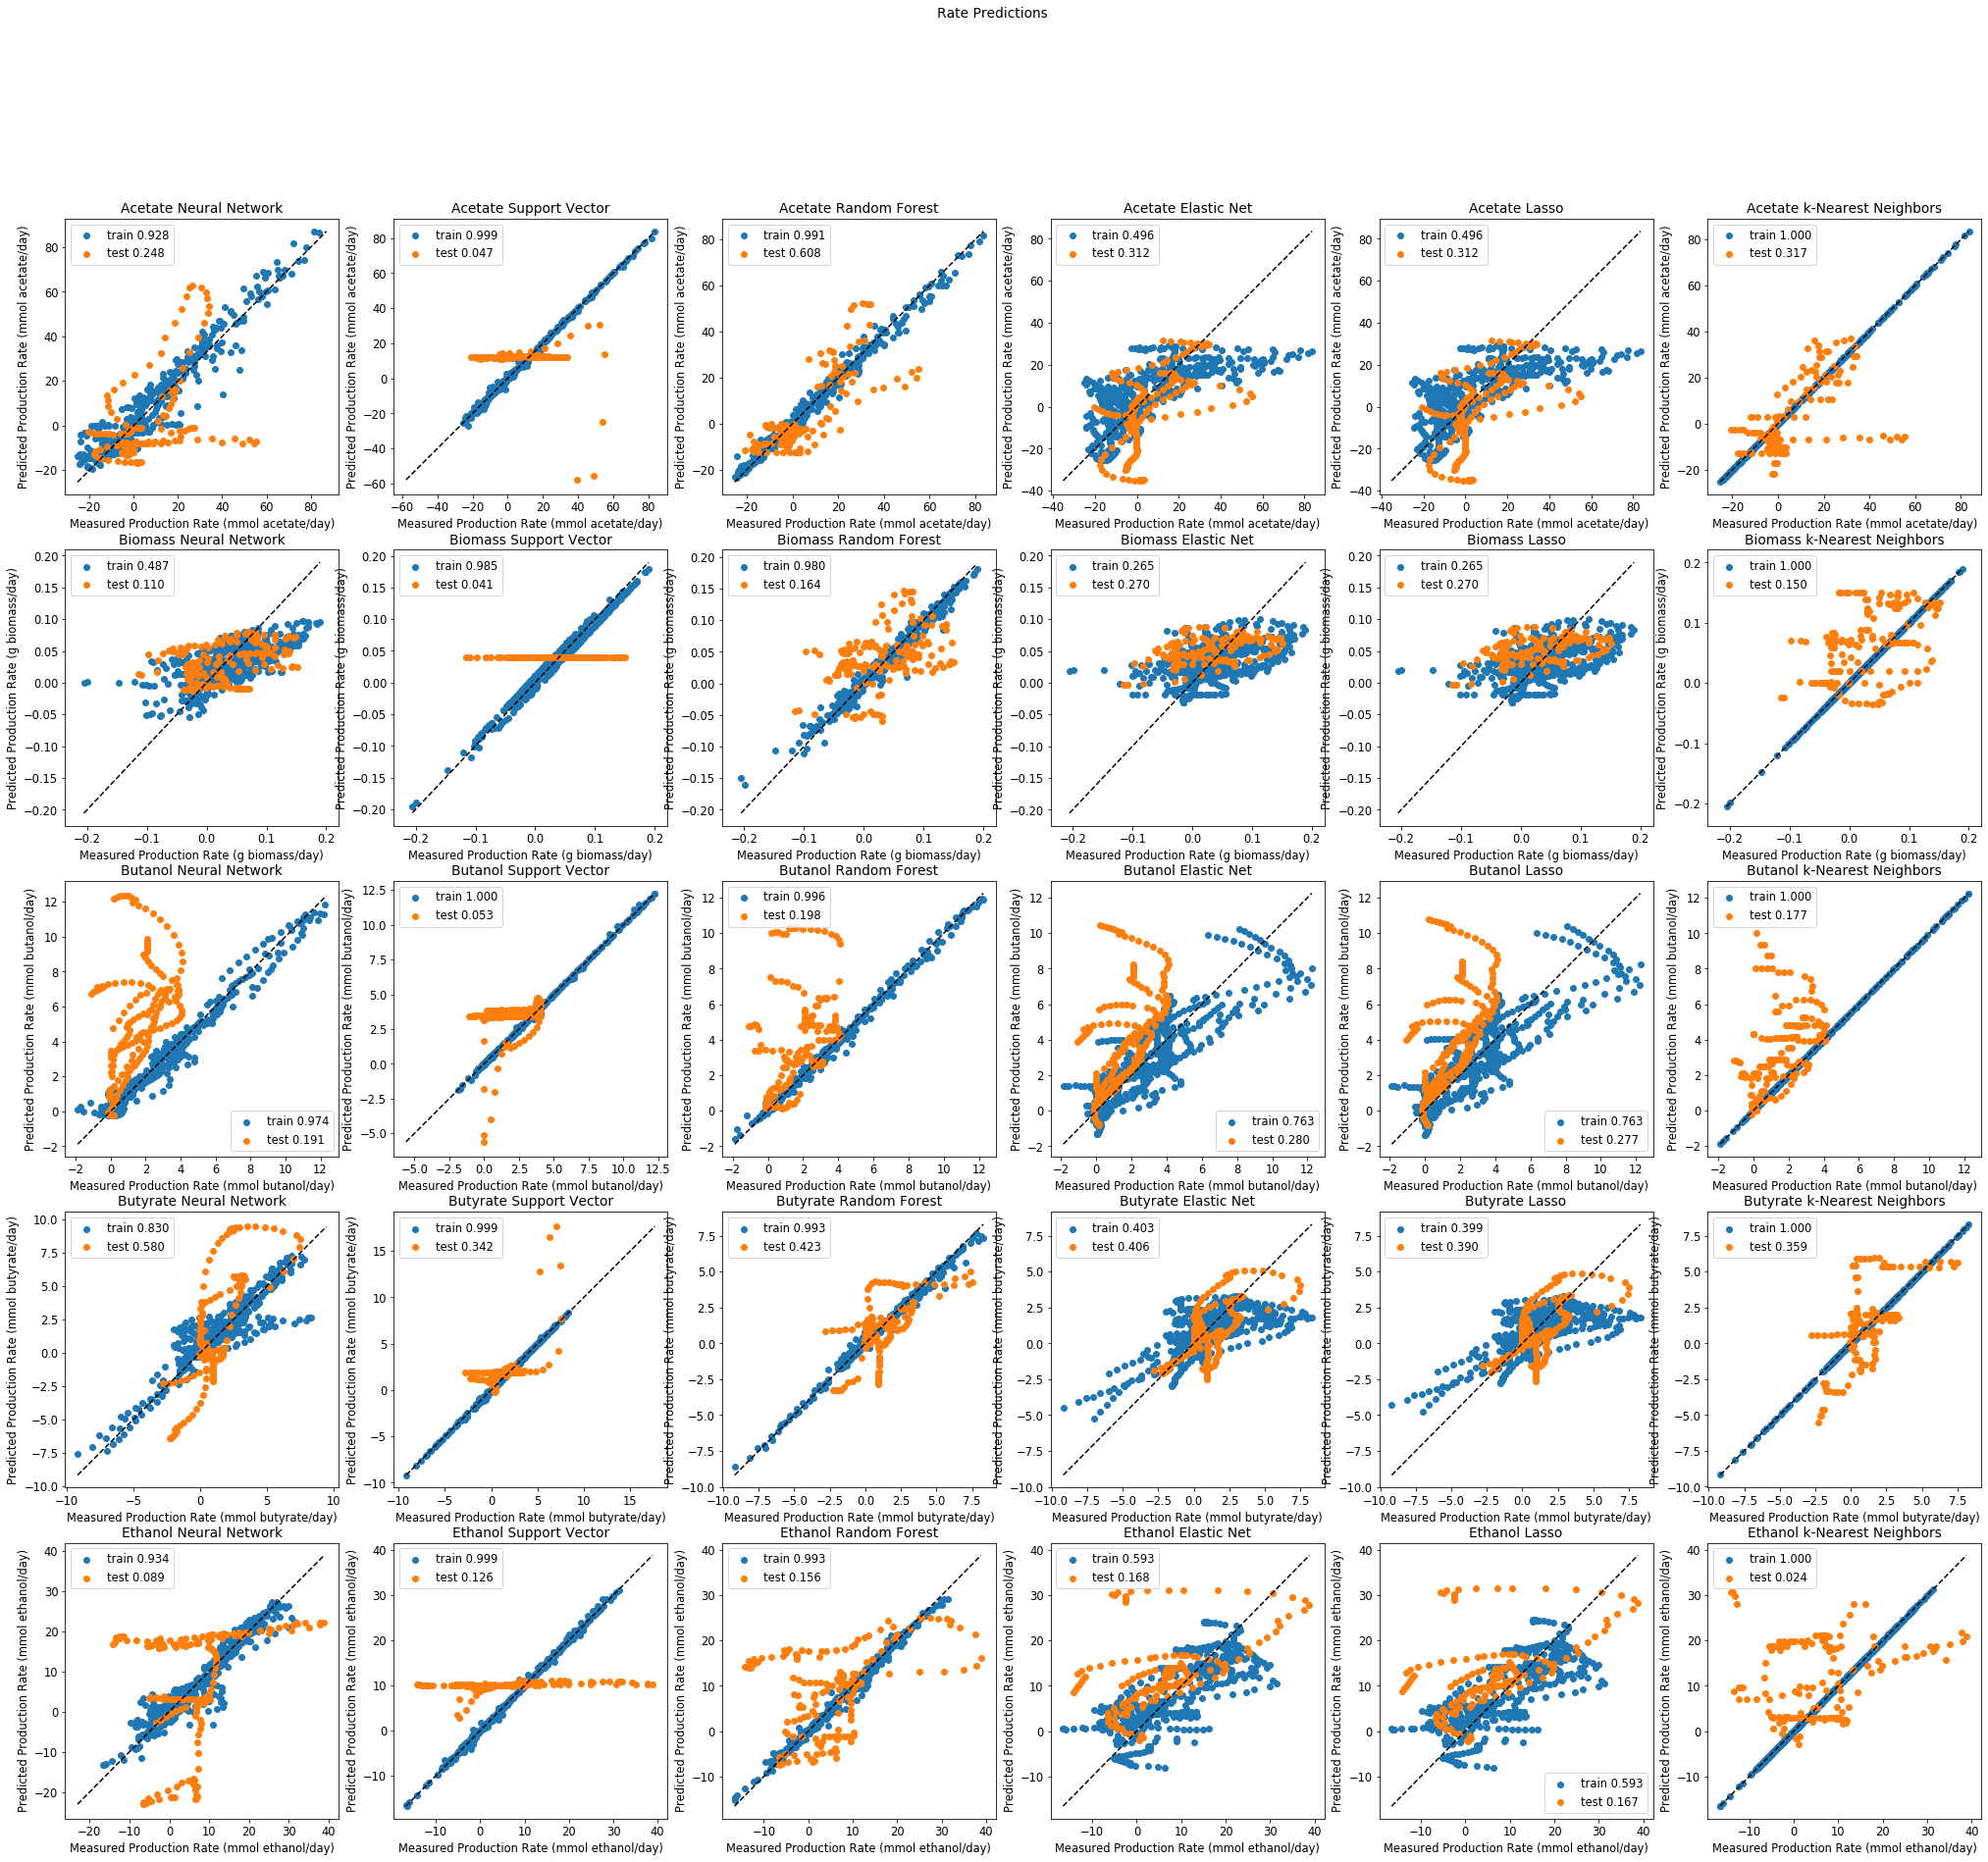

In [13]:
plt.rcParams.update({'font.size': 11.5})
fig, ax = plt.subplots(5, 6, figsize=(35, 30))
fig.suptitle(f'Rate Predictions')

algorithm_dictionary = {
    'nn': 'Neural Network',
    'svm_rbf': 'Support Vector', 
    'rf' : 'Random Forest',
    'en': 'Elastic Net', 
    'lasso' : 'Lasso',
    'knn': 'k-Nearest Neighbors'
}

for x_index, output in enumerate(['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']):
    train_r2_list = []
    test_r2_list = []
    for y_index, algorithm in enumerate(['nn', 'svm_rbf', 'rf', 'en', 'lasso', 'knn']):
 
        # Set title, x label, and y label of the subplot
        ax[x_index, y_index].title.set_text(f'{output.capitalize()} {algorithm_dictionary[algorithm]}')
        if output != 'biomass':
            ax[x_index, y_index].set_xlabel(f'Measured Production Rate (mmol {output}/day)')
            ax[x_index, y_index].set_ylabel(f'Predicted Production Rate (mmol {output}/day)')
        else:
            ax[x_index, y_index].set_xlabel(f'Measured Production Rate (g biomass/day)')
            ax[x_index, y_index].set_ylabel(f'Predicted Production Rate (g biomass/day)')
            
        # Plot training and test data by plotting predicted Production Rates vs measured Production Rates
        ax[x_index, y_index].scatter(train_prediction_df[f'{output} measured'], train_prediction_df[f'{output} {algorithm}'])
        ax[x_index, y_index].scatter(test_prediction_df[f'{output} measured'], test_prediction_df[f'{output} {algorithm}'])
        
        # ensure that all plots are square, so that 45 degree line looks the same in all plots
        minimum = min(pd.concat([
            train_prediction_df[f'{output} measured'],
            train_prediction_df[f'{output} {algorithm}'],
            test_prediction_df[f'{output} measured'],
            test_prediction_df[f'{output} {algorithm}']
        ], axis=0))
        maximum = max(pd.concat([
            train_prediction_df[f'{output} measured'],
            train_prediction_df[f'{output} {algorithm}'],
            test_prediction_df[f'{output} measured'],
            test_prediction_df[f'{output} {algorithm}']
        ], axis=0))
        
        # calculate train data r-squared
        measured_train_data = train_prediction_df[f'{output} measured']
        predicted_train_data = train_prediction_df[f'{output} {algorithm}']
        # could use scikitlearn's r-squared value
        # train_r2 = sklearn.metrics.r2_score(measured_train_data, predicted_train_data)
        _, _, train_r_value, _, _ = scipy.stats.linregress(measured_train_data, predicted_train_data)
        train_r2_list.append(train_r_value**2)

        # calculate test data r-squared
        measured_test_data = test_prediction_df[f'{output} measured']
        predicted_test_data = test_prediction_df[f'{output} {algorithm}']
        # could use scikitlearn's r-squared value
        # test_r2 = sklearn.metrics.r2_score(measured_test_data, predicted_test_data)
        _, _, test_r_value, _, _ = scipy.stats.linregress(measured_test_data, predicted_test_data)
        test_r2_list.append(test_r_value**2)
        
        # add legend to the plot
        ax[x_index, y_index].legend([f'train {train_r_value**2:.3f}', f'test {test_r_value**2:.3f}'])
        
        # plot the subplot
        ax[x_index, y_index].plot([minimum, maximum], [minimum, maximum], 'k--') #row=0, col=0

plt.savefig(f'../figures/scatter_plots.png', dpi=100)
plt.show()

### Plot bar graph of r squared values

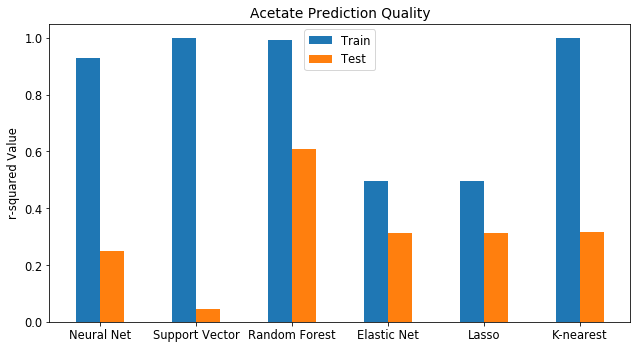

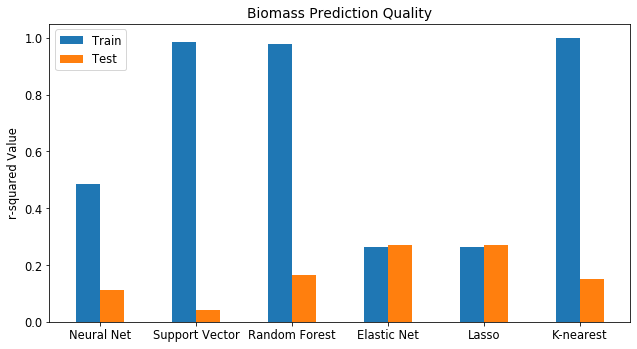

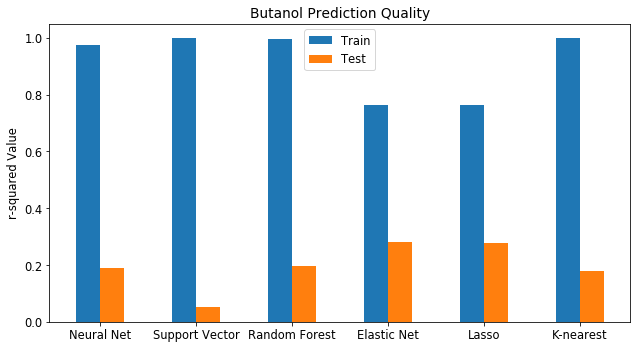

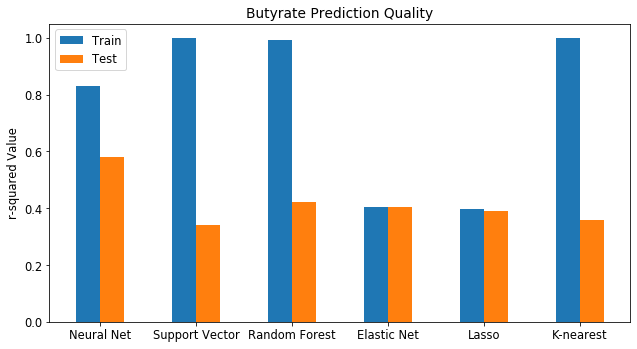

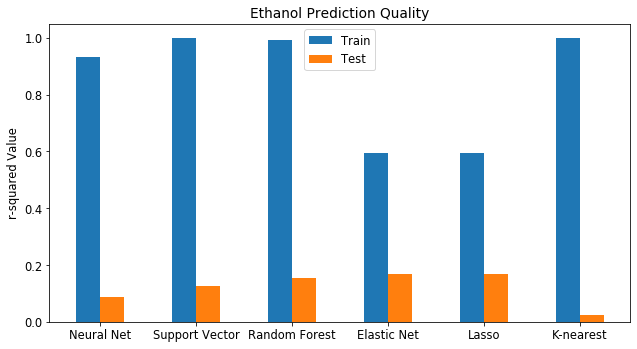

In [14]:
plt.rcParams.update({'font.size': 11.5})
for output in ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']:
    train_r2_list = []
    test_r2_list = []
    for algorithm in ['nn', 'svm_rbf', 'rf', 'en', 'lasso', 'knn']:

        # Calculate training data r-squared
        measured_train_data = train_prediction_df[f'{output} measured']
        predicted_train_data = train_prediction_df[f'{output} {algorithm}']
        # could use scikitlearn's r-squared value
        # train_r2 = sklearn.metrics.r2_score(measured_train_data, predicted_train_data)
        _, _, train_r_value, _, _ = scipy.stats.linregress(measured_train_data, predicted_train_data)
        train_r2_list.append(train_r_value**2)

        # Calculate test data r-squared
        measured_test_data = test_prediction_df[f'{output} measured']
        predicted_test_data = test_prediction_df[f'{output} {algorithm}']
        # could use scikitlearn's r-squared value
        # test_r2 = sklearn.metrics.r2_score(measured_test_data, predicted_test_data)
        _, _, test_r_value, _, _ = scipy.stats.linregress(measured_test_data, predicted_test_data)
        test_r2_list.append(test_r_value**2)
    
    # define values to help with plotting
    x = np.arange(6)  # the label locations
    width = 0.25  # the width of the bars

    # plot training and testing r-squared values
    fig, ax = plt.subplots(figsize=(9,5))
    rects1 = ax.bar(x - .5 * width, train_r2_list,      width, label='Train')
    rects3 = ax.bar(x + .5 * width, test_r2_list, width, label='Test')

    # Add labels for title and custom x-axis tick labels, etc.
    ax.set_ylabel('r-squared Value')
    ax.set_title(f'{output.capitalize()} Prediction Quality')
    ax.set_xticks(x)
    ax.set_xticklabels(['Neural Net', 'Support Vector', 'Random Forest', 'Elastic Net', 'Lasso', 'K-nearest'])
    ax.legend()

    fig.tight_layout()
    plt.savefig(f'../figures/bar_graph_{output}.png', dpi=100)
#     plt.show()

### Make data frames to plot feature importance of metabolite and gases

In [15]:
features = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol', 'CO', 'CO2', 'H2', 'flow rate']

metabolites = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']
gases = ['CO', 'CO2', 'H2', 'flow rate']

metabolite_feature_importance_list = []
gases_feature_importance_list = []

for output in ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']:
    
    # get trained random forest model for the output
    model = trained_models[f'{output} rf']
    
    # get feature importance
    feature_importance_array = model.feature_importances_
    # print(feature_importance_array)
    
    # label feature importances
    feature_importance_dictionary = {feature: importance for feature, importance in zip(features, feature_importance_array)}
    
    # split dictionary into metabolites and gases and add the split dictionaries to lists
    metabolite_feature_importance_list.append({metabolite: feature_importance_dictionary[metabolite] for metabolite in metabolites})
    gases_feature_importance_list.append({gas: feature_importance_dictionary[gas] for gas in gases})
    
# convert list of dictionaries to dataframes
metabolite_feature_importance_df = pd.DataFrame(metabolite_feature_importance_list, index=metabolites)
gases_feature_importance_df = pd.DataFrame(gases_feature_importance_list, index=metabolites)

# display the dataframes
display(metabolite_feature_importance_df)
display(gases_feature_importance_df)


,acetate,biomass,butanol,butyrate,ethanol
acetate,0.040549,0.054858,0.137484,0.604574,0.107448
biomass,0.151658,0.145942,0.246271,0.248723,0.119893
butanol,0.050810,0.147115,0.026845,0.583861,0.051142
butyrate,0.123714,0.103614,0.143341,0.373907,0.154962
ethanol,0.039437,0.647147,0.064145,0.101251,0.095893


,CO,CO2,H2,flow rate
acetate,0.003025,0.012318,0.003349,0.012223
biomass,0.010821,0.011224,0.015466,0.011418
butanol,0.002694,0.003532,0.107018,0.015587
butyrate,0.087288,0.001978,0.003169,0.004623
ethanol,0.005695,0.006507,0.002654,0.012236


### Plot metabolite feature importance

,acetate,biomass,butanol,butyrate,ethanol
acetate,0.040549,0.054858,0.137484,0.604574,0.107448
biomass,0.151658,0.145942,0.246271,0.248723,0.119893
butanol,0.050810,0.147115,0.026845,0.583861,0.051142
butyrate,0.123714,0.103614,0.143341,0.373907,0.154962
ethanol,0.039437,0.647147,0.064145,0.101251,0.095893


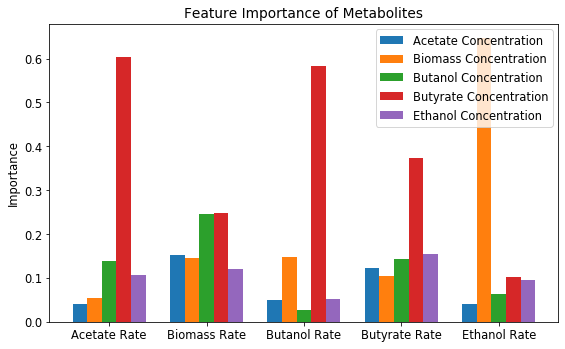

In [16]:
display(metabolite_feature_importance_df)

# This helps with formatting 
x = np.arange(5)  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))

for counter, (index, row) in enumerate(metabolite_feature_importance_df.transpose().iterrows()):
    output_feature_importances = list(row)
    
    rects = ax.bar(x - 0.3 + 0.15*counter, output_feature_importances , width, label=f'{index.capitalize()} Concentration')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(f'Importance')

ax.set_title(f'Feature Importance of Metabolites')
ax.set_xticks(x)
labels = ['Acetate Rate', 'Biomass Rate', 'Butanol Rate', 'Butyrate Rate', 'Ethanol Rate']
ax.set_xticklabels(labels)
ax.legend()
# ax.set_yscale('log')

fig.tight_layout()
plt.savefig(f'../figures/feature_importance_metabolites.png', dpi=100)
plt.show()

### Plot gases feature importance

,CO,CO2,H2,flow rate
acetate,0.003025,0.012318,0.003349,0.012223
biomass,0.010821,0.011224,0.015466,0.011418
butanol,0.002694,0.003532,0.107018,0.015587
butyrate,0.087288,0.001978,0.003169,0.004623
ethanol,0.005695,0.006507,0.002654,0.012236


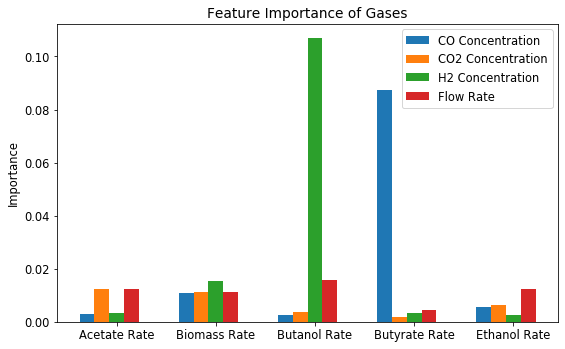

In [17]:
display(gases_feature_importance_df)

# This helps with formatting 
x = np.arange(5)  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))

for counter, (index, row) in enumerate(gases_feature_importance_df.transpose().iterrows()):
    output_feature_importances = list(row)
    if index != 'flow rate':
        index = index + ' Concentration' 
    else:
        index = 'Flow Rate'
    rects = ax.bar(x - 0.3 + 0.15*counter, output_feature_importances , width, label=f'{index}')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(f'Importance')

ax.set_title(f'Feature Importance of Gases')
ax.set_xticks(x)
labels = ['Acetate Rate', 'Biomass Rate', 'Butanol Rate', 'Butyrate Rate', 'Ethanol Rate']
ax.set_xticklabels(labels)
ax.legend()
# ax.set_yscale('log')

fig.tight_layout()
plt.savefig(f'../figures/feature_importance_gases.png', dpi=100)
plt.show()

### Plot feature importance of each gas for each output

,CO,CO2,H2,flow rate
acetate,0.003025,0.012318,0.003349,0.012223
biomass,0.010821,0.011224,0.015466,0.011418
butanol,0.002694,0.003532,0.107018,0.015587
butyrate,0.087288,0.001978,0.003169,0.004623
ethanol,0.005695,0.006507,0.002654,0.012236


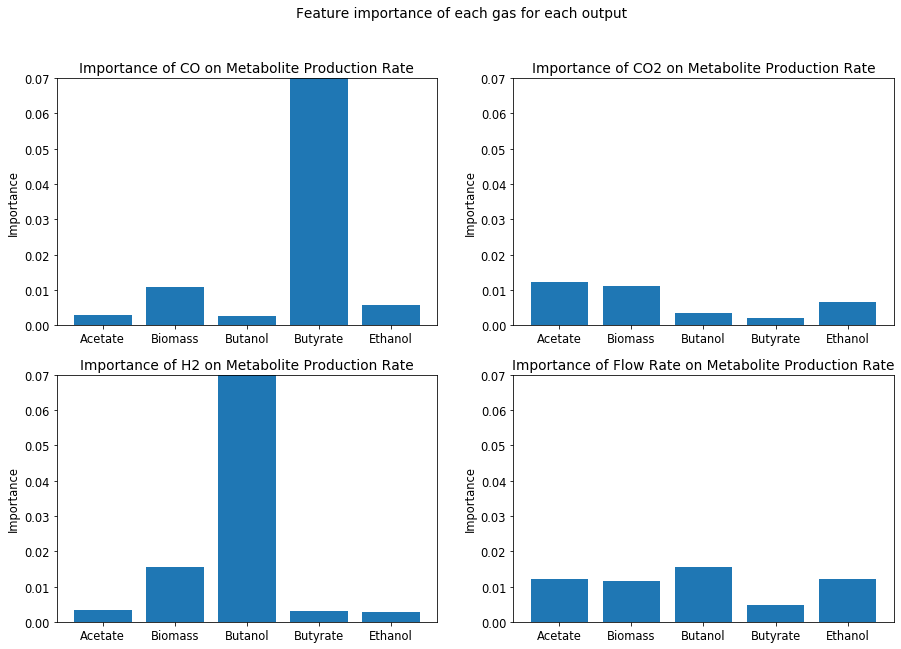

In [18]:
display(gases_feature_importance_df)

plt.rcParams.update({'font.size': 11.5})
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'Feature importance of each gas for each output')

labels = [label.capitalize() for label in gases_feature_importance_df.index]

ax[0,0].title.set_text(f'Importance of CO on Metabolite Production Rate')
ax[0,0].set_ylabel(f'Importance')
ax[0,0].axis(ymin=0.0,ymax=0.07)
rects = ax[0,0].bar(labels, gases_feature_importance_df['CO'])

ax[0,1].title.set_text(f'Importance of CO2 on Metabolite Production Rate')
ax[0,1].set_ylabel(f'Importance')
ax[0,1].axis(ymin=0.0,ymax=0.07)
rects = ax[0,1].bar(labels, gases_feature_importance_df['CO2'])

ax[1,0].title.set_text(f'Importance of H2 on Metabolite Production Rate')
ax[1,0].set_ylabel(f'Importance')
ax[1,0].axis(ymin=0.0,ymax=0.07)
rects = ax[1,0].bar(labels, gases_feature_importance_df['H2'])

ax[1,1].title.set_text(f'Importance of Flow Rate on Metabolite Production Rate')
ax[1,1].set_ylabel(f'Importance')
ax[1,1].axis(ymin=0.0,ymax=0.07)
rects = ax[1,1].bar(labels, gases_feature_importance_df['flow rate'])

plt.savefig(f'../figures/feature_importance_per_gas.png', dpi=100)

plt.show()

### Save gases_feature_importance as csv

In [19]:
gases_feature_importance_df.to_csv('../data/gases_importance.csv')

### -- Stopping here --